This project was completed by insert full name here in partial fulfilment of ECON-UB.0232,
Data Bootcamp, Spring 2018. I certify that the NYU Stern Honor Code applies to this project.
In particular, I have:
Clearly acknowledged the work and efforts of others when submitting written work as our own.
The incorporation of the work of others–including but not limited to their ideas, data, creative
expression, and direct quotations (which should be designated with quotation marks), or paraphrasing
thereof– has been fully and appropriately referenced using notations both in the text
and the bibliography.
And I understand that:
Submitting the same or substantially similar work in multiple courses, either in the same semester
or in a different semester, without the express approval of all instructors is strictly forbidden.
I acknowledge that a failure to abide by NYU Stern Honor Code will result in a failing grade for
the project and course.
With this project we have executed a study of citibank through the study of demographics, mainly age and gender. We have come to the conclusion that citibike should mainly focus on marketing their program to males between the ages of 18-30 and 60-80 given that these users experience the highest average cost per minute from riding. If Citi Bike attracts customers who use the program least, they will be able to spread their assets amonst more customers. Unfortunately, we were unable to provide significant correlations between variables in our data and a further investigation with a larger dataset should be done to prove our conclusions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
citi = pd.read_csv('/Users/MartinSmit/Documents/NYUAD/Junior/Data Bootcamp/Final/CitiFinalData.csv')

In [3]:
del citi['Unnamed: 0']
citi=citi[citi['Age']<91]

In [4]:
citi

,tripduration,starttime,stoptime,start station latitude,start station longitude,end station latitude,end station longitude,bikeid,birth year,gender,Age,Gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,40.750020,-73.969053,40.722293,-73.991475,18660,1960.0,2,58.0,Female
1,363,1/1/2015 0:02,1/1/2015 0:08,40.743174,-74.003664,40.739355,-73.999318,16085,1963.0,1,55.0,Male
2,346,1/1/2015 0:04,1/1/2015 0:10,40.740964,-73.986022,40.749013,-73.988484,20845,1974.0,1,44.0,Male
3,182,1/1/2015 0:04,1/1/2015 0:07,40.683178,-73.965964,40.688515,-73.964763,19610,1969.0,1,49.0,Male
4,969,1/1/2015 0:05,1/1/2015 0:21,40.745168,-73.986831,40.726218,-73.983799,20197,1977.0,1,41.0,Male
5,496,1/1/2015 0:07,1/1/2015 0:15,40.750073,-73.998393,40.735238,-74.000271,20788,1969.0,2,49.0,Female
6,152,1/1/2015 0:07,1/1/2015 0:09,40.748549,-73.988084,40.745168,-73.986831,19006,1972.0,1,46.0,Male
7,1183,1/1/2015 0:08,1/1/2015 0:28,40.739323,-74.008119,40.738177,-73.977387,17640,1985.0,2,33.0,Female
8,846,1/1/2015 0:09,1/1/2015 0:23,40.762272,-73.987882,40.756458,-73.993722,15691,1991.0,1,27.0,Male
9,576,1/1/2015 0:10,1/1/2015 0:20,40.748238,-73.978311,40.738177,-73.977387,17837,1991.0,1,27.0,Male


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a486a66a0>,
      dtype=object)

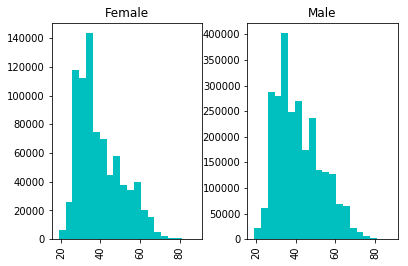

In [5]:
citi.hist('Age', by='Gender', bins=20, color='c')

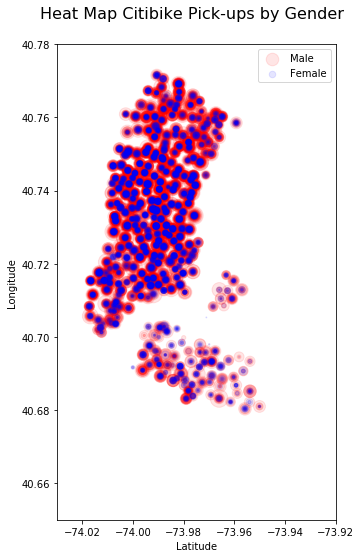

In [6]:
citi_male = citi[citi['Gender']=='Male']
citi_female = citi[citi['Gender']=='Female']
plt.figure(figsize=(5,5*1.75))
plt.scatter(citi_male['start station longitude'][:10000],citi_male['start station latitude'][:10000], s=0.01*citi_male.groupby('start station longitude', as_index=False).size(), c='r', alpha=0.1, label='Male')
plt.scatter(citi_female['start station longitude'][:10000],citi_female['start station latitude'][:10000], s=0.01*citi_female.groupby('start station longitude', as_index=False).size(), c='b', alpha=0.1, label='Female')
plt.axis([-74.03,-73.92,40.65,40.78])
plt.xlabel('Latitude')
plt.legend()
plt.ylabel('Longitude')
plt.suptitle('Heat Map Citibike Pick-ups by Gender', size=16, y=0.94)
plt.style.use('bmh')
plt.show()

Text(0.5,0.97,'Ratio of Men/Women Riders Per Age Group')

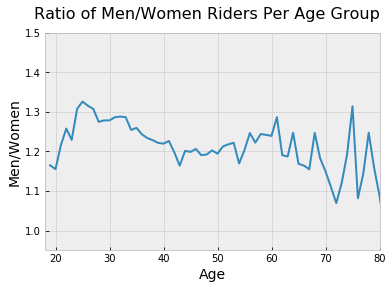

In [7]:
plt.plot(citi.groupby('Age')['gender'].mean())
plt.axis([18, 80,0.95,1.5])
plt.style.use('fivethirtyeight')
plt.xlabel('Age', size=14)
plt.ylabel('Men/Women', size=14)
plt.suptitle('Ratio of Men/Women Riders Per Age Group', size=16, y=0.97)

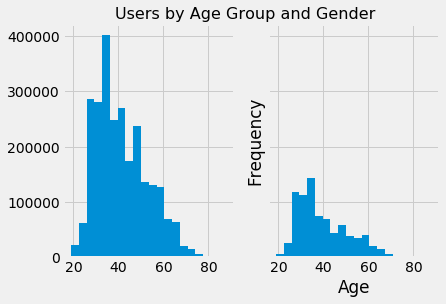

In [8]:
x=citi_female['Age']
y=citi_male['Age']

fig, ax = plt.subplots(1, 2, sharey=True)
n_bins=20
plt.xlabel('Age')
plt.ylabel('Frequency')

ax[0].hist(y, bins=n_bins)
ax[1].hist(x, bins=n_bins)
plt.suptitle('Users by Age Group and Gender', size=16, y=0.94)
plt.show()

In [9]:
citi_gender=pd.DataFrame()
citi_gender['sum_duration']=citi.groupby(['Gender']).tripduration.sum()
citi_gender['count']=citi.groupby(['Gender']).size()
citi_gender['duration_capita']=citi_gender['sum_duration']/citi_gender['count']*(len(citi.index)/71429)
citi_gender['cost_capita']=37.25/citi_gender['duration_capita']*60
citi_gender.reset_index(level=0,inplace=True)
citi_gender['Gender2']=citi_gender['Gender'].map({'Male':1,'Female':0})
# citi_gender['count']=citi.groupby(['Gender'])['tripduration'].count()
citi_gender

,Gender,sum_duration,count,duration_capita,cost_capita,Gender2
0,Female,670605848,811170,39033.707008,0.057258,0
1,Male,1809229479,2556766,33410.810800,0.066895,1


In [10]:
citi_gender.shape

(2, 6)

Text(0,0.5,'Cost per Capita($)')

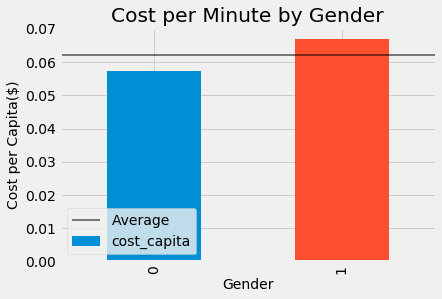

In [11]:
fig1, ax1=plt.subplots()
citi_gender['cost_capita'].plot(ax=ax1,kind='bar')
plt.axhline(citi_gender['cost_capita'].mean(),linewidth=2.0,color='black',alpha=0.5, label='Average')
plt.legend()
plt.title('Cost per Minute by Gender')
plt.xlabel('Gender', size=14)
plt.ylabel('Cost per Capita($)', size=14)

In [12]:
print(smf.ols('cost_capita ~ Gender2',data=citi_gender).fit().summary())

                            OLS Regression Results                            
Dep. Variable:            cost_capita   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 20 Dec 2018   Prob (F-statistic):                nan
Time:                        18:25:08   Log-Likelihood:                 75.265
No. Observations:                   2   AIC:                            -146.5
Df Residuals:                       0   BIC:                            -149.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0573        inf          0        n

/Users/MartinSmit/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/MartinSmit/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/MartinSmit/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/Users/MartinSmit/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/Users/MartinSmit/anaconda3/lib/python3.6/site-packages/statsmodels/regress

In [13]:
print(smf.ols('tripduration ~ Age + gender',data=citi).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                 1.927e+04
Date:                Thu, 20 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:25:10   Log-Likelihood:            -2.6006e+07
No. Observations:             3372554   AIC:                         5.201e+07
Df Residuals:                 3372551   BIC:                         5.201e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    483.6462      1.434    337.383      0.0